In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Basic

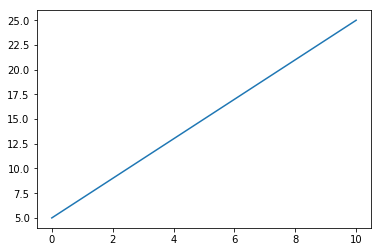

In [2]:
x = np.linspace(0, 10, 100)
y = 2 * x + 5
plt.plot(x, y)
plt.show()

Bar graph

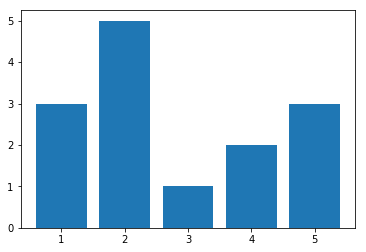

In [3]:
v = [3, 5, 1, 2, 3]
x = np.arange(len(v)) + 1
plt.bar(x, v)
plt.show()

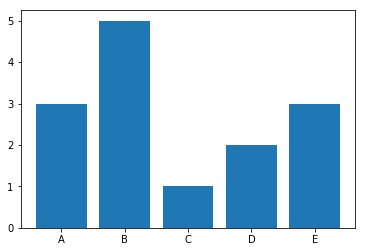

In [4]:
v = [3, 5, 1, 2, 3]
x = np.arange(len(v)) + 1
labels = ['A', 'B', 'C', 'D', 'E']
plt.bar(x, v, tick_label=labels, align='center')
plt.show()

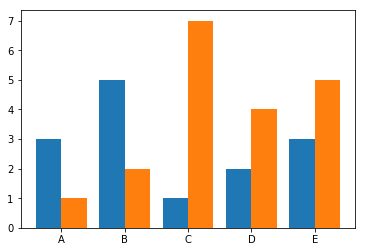

In [5]:
v1 = [3, 5, 1, 2, 3]
v2 = [1, 2, 7, 4, 5]

x = np.arange(len(v1)) + 1
w = 0.4

labels = ['A', 'B', 'C', 'D', 'E']
plt.bar(x, v1, align='center', width=w)
plt.bar(x+w, v2, align='center', width=w)
plt.xticks(x + w/2, labels)
plt.show()

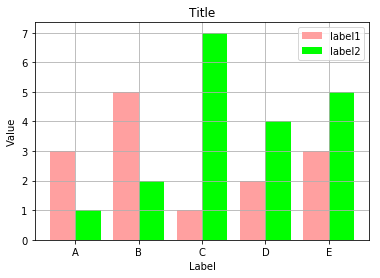

In [6]:
v1 = [3, 5, 1, 2, 3]
v2 = [1, 2, 7, 4, 5]

x = np.arange(len(v1)) + 1
w = 0.4

labels = ['A', 'B', 'C', 'D', 'E']
plt.bar(x, v1, align='center', width=w, color='#FFA0A0', label='label1')
plt.bar(x+w, v2, align='center', width=w, color='#00FF00', label='label2')
plt.xticks(x + w/2, labels)
plt.legend()
plt.title("Title")
plt.xlabel("Label")
plt.ylabel("Value")
plt.grid(True)
plt.show()

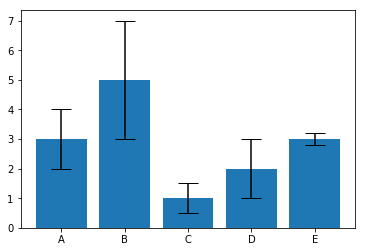

In [7]:
v = [3, 5, 1, 2, 3]
e = [1, 2, .5, 1, .2]
x = np.arange(len(v)) + 1
labels = ['A', 'B', 'C', 'D', 'E']
plt.bar(x, v, yerr=e, capsize=10, tick_label=labels, align='center')
plt.show()

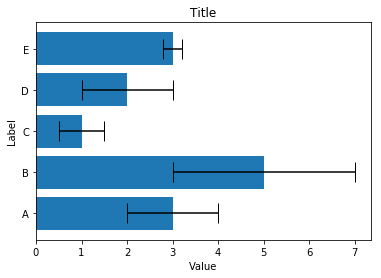

In [8]:
v = [3, 5, 1, 2, 3]
e = [1, 2, .5, 1, .2]
x = np.arange(len(v)) + 1
labels = ['A', 'B', 'C', 'D', 'E']
plt.barh(x, v, xerr=e, capsize=10, tick_label=labels, align='center')
plt.title("Title")
plt.ylabel("Label")
plt.xlabel("Value")
plt.show()

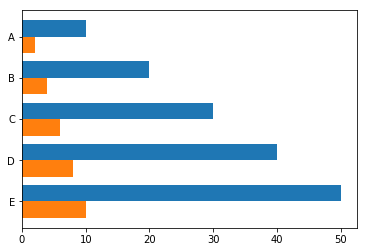

In [9]:
x = np.arange(5) + 1
v1 = np.linspace(10,50, 5)
v2 = x * 2
w = 0.4

labels = ['A', 'B', 'C', 'D', 'E']

# Reverse
x = x[::-1]

# Show
plt.barh(x, v1, align='center', height=w)
plt.barh(x-w, v2, align='center', height=w)
plt.yticks(x - w/2, labels)
plt.show()